# BA222 SPRING 2023 – HW04
Due on 05/01 (Monday) by 11:59 PM
### by Euijoon David Kim
---

### Instructions
- Submit a single .ipynb (jupyter notebook) file as your solution on Blackboard
- Name the file as BA222_HW04_lastNameFirstName
- Label each cell with the question number
- Type any necessary explanation in your code as a comment

---
---
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

---
---

## Problem 1. Forecasting and Non-Linear Models

For this problem we are going to use the ausbeer.csv data to predict the quarterly beer production in Australia.

Only use the data up to 1969 Q4 (inclusive) to estimate the parameters of the model.

Use the rest of the data to test the predictions of the model.

In [2]:
ab = pd.read_csv('data/ausbeer.csv')
ab.head()

,Unnamed: 0,yq,val
0,1,1956 Q1,284
1,2,1956 Q2,213
2,3,1956 Q3,227
3,4,1956 Q4,308
4,5,1957 Q1,262


In [3]:
ab['year'] = ab.yq.str.split(' ').str[0]
ab['quarter'] = ab.yq.str.split(' ').str[1]
ab.columns = ['t', 'yq', 'val', 'year', 'quarter']
ab

,t,yq,val,year,quarter
0,1,1956 Q1,284,1956,Q1
1,2,1956 Q2,213,1956,Q2
2,3,1956 Q3,227,1956,Q3
3,4,1956 Q4,308,1956,Q4
4,5,1957 Q1,262,1957,Q1
...,...,...,...,...,...
63,64,1971 Q4,487,1971,Q4
64,65,1972 Q1,419,1972,Q1
65,66,1972 Q2,378,1972,Q2
66,67,1972 Q3,393,1972,Q3


In [4]:
ab.loc[ab.yq == '1969 Q4']

,t,yq,val,year,quarter
55,56,1969 Q4,446,1969,Q4


In [5]:
abSample = ab.iloc[0:56]

In [6]:
abSample.tail()

,t,yq,val,year,quarter
51,52,1968 Q4,442,1968,Q4
52,53,1969 Q1,383,1969,Q1
53,54,1969 Q2,332,1969,Q2
54,55,1969 Q3,361,1969,Q3
55,56,1969 Q4,446,1969,Q4


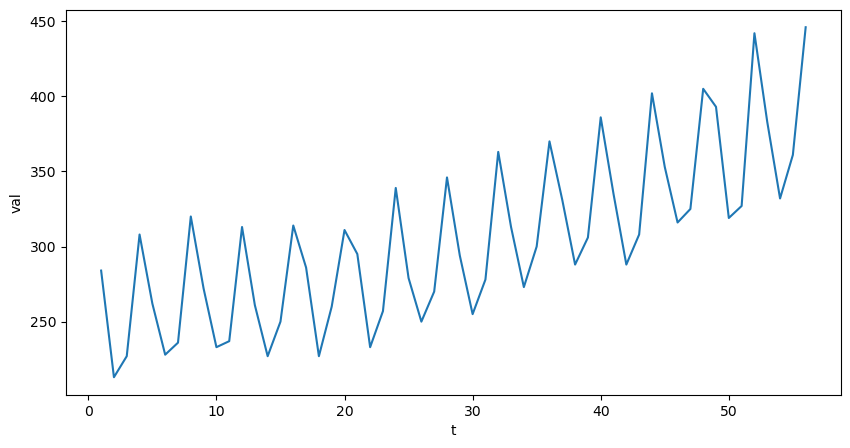

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(data=abSample, x='t', y='val')
plt.show()

---
---

1. Make a graph the yearly average production and one of the average production by quarter. Interpret both graphs. What different patterns can you discern from each graph?

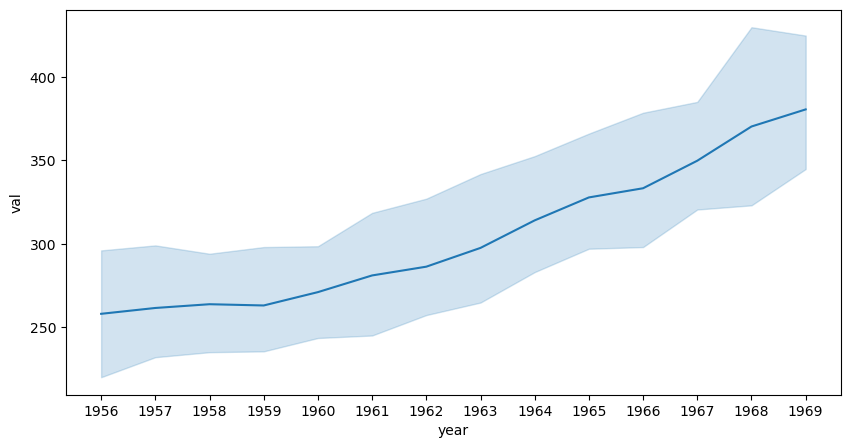

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(data=abSample, x='year', y='val')
plt.show()

In [9]:
# This graph shows that there is an increasing trend in the yearly average production

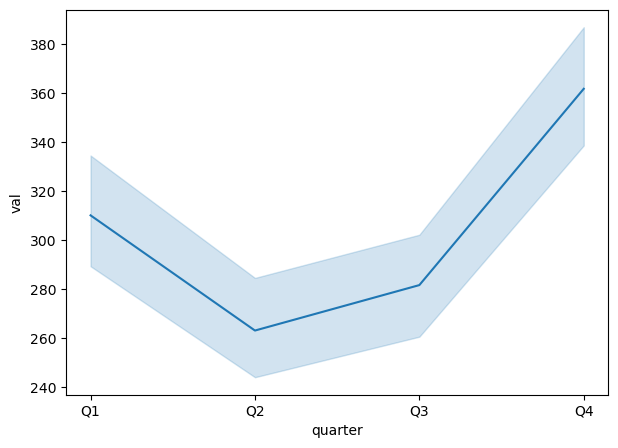

In [10]:
plt.figure(figsize=(7,5))
sns.lineplot(data=abSample, x='quarter', y='val')
plt.show()

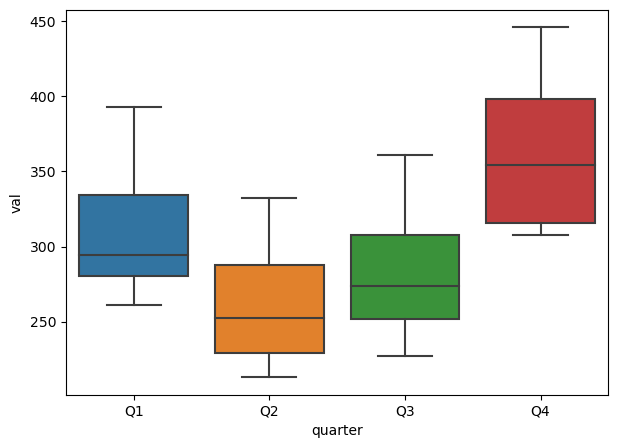

In [11]:
plt.figure(figsize=(7,5))
sns.boxplot(data=abSample, x='quarter', y='val')
plt.show()

In [12]:
# The graph illustrating the average production by quarter, shows that there is a seasonal trend in the average production.

---

2. Make a line plot of the quarterly beer production in Australia. Are the results consistent with your answer in part 1?

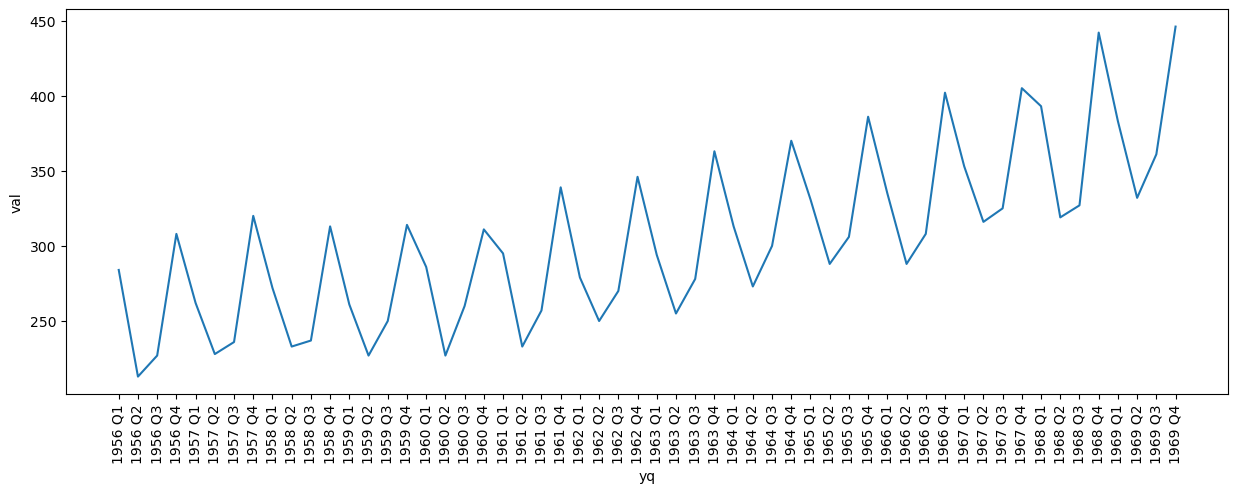

In [13]:
plt.figure(figsize=(15,5))
sns.lineplot(data=abSample, x='yq', y='val')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Yes, it is consistent with the answer in part 1. There is an increasing and seasonal trend.

---

3. Estimate a linear regression model for the beer production using a linear time trend (time as independent variable). Interpret the results for the intercept and slope coefficients. Discuss the statistical significance of the beta coefficients. Inspect the residuals of the regression, do you think they are randomly distributed or do you detect any pattern?

In [15]:
reg1 = smf.ols('val ~ t', data=abSample).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    val   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     61.64
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.72e-10
Time:                        23:35:31   Log-Likelihood:                -283.25
No. Observations:                  56   AIC:                             570.5
Df Residuals:                      54   BIC:                             574.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    232.4110     10.498     22.138      0.000     211.363     253.459
t              2.5157      0.320      7.851      0.000       1.873       3.158
==============================================================================
Omnibus:                       10.366   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.671
Skew:                           0.467   Prob(JB):                       0.0967
Kurtosis:                       1.938   Cond. No.                         66.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Intercept : The average value of the variable 'val' is 226.2384 when t = 0.
#             (The period previous to the start of the data)

# Slope : For each additional unit of t, the average value of the variable val increases by about 2.8013

In [17]:
# The intercept and the slope are both statistically different than zero.

# |tStat| > 2

# pvalue < 0.05

# 0 not in 95% Confidence Interval

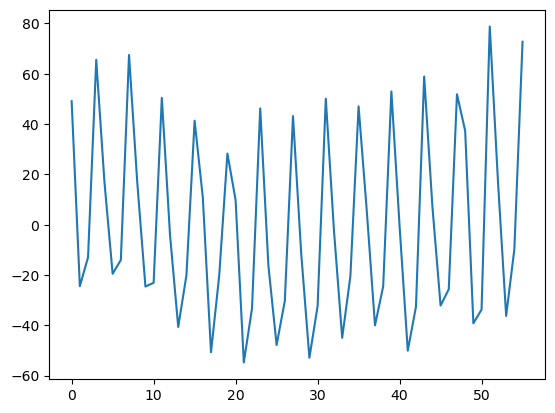

In [18]:
reg1.resid.plot()
plt.show()

In [19]:
# The resid plot doesn't seem random. There is a cyclical pattern.

---

4. Estimate a linear regression model for the beer production using a dummy variable for each quarter and a linear time trend. Is there a seasonal component in the Australian beer data? How can you tell?

In [20]:
reg2 = smf.ols('val ~ t + C(quarter)', data=abSample).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    val   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     236.9
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.87e-32
Time:                        23:35:31   Log-Likelihood:                -221.28
No. Observations:                  56   AIC:                             452.6
Df Residuals:                      51   BIC:                             462.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          244.0772      4.597     53.098      0.000     234.849     253.305
C(quarter)[T.Q2]   -49.5157      4.986     -9.932      0.000     -59.525     -39.507
C(quarter)[T.Q3]   -33.3885      4.989     -6.692      0.000     -43.405     -23.372
C(quarter)[T.Q4]    44.3816      4.995      8.885      0.000      34.353      54.410
t                    2.4442      0.109     22.365      0.000       2.225       2.664
==============================================================================
Omnibus:                        4.613   Durbin-Watson:                   1.039
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                3.566
Skew:                           0.532   Prob(JB):                        0.168
Kurtosis:                       3.630   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
## Yes there is a seasonal component in the Australian beer production.
## The average difference in each quarter is statistically not equal to 0, therefore, there is a seasonal quarterly average difference.

# Intercept : Estimation of the average value of variable 'val' is 244.0772 when t = 0 and quarter = 1.

# C(quarter)[T.Q2] : The average difference in variable 'val' between quarter 1 and quarter 2 is -49.5157 when controlling for the time series.

# C(quarter)[T.Q3] : The average difference in variable 'val' between quarter 1 and quarter 3 is -33.3885 when controlling for the time series.

# C(quarter)[T.Q4] : The average difference in variable 'val' between quarter 1 and quarter 4 is 44.3816 when controlling for the time series.

# t : For each additional t (quarter), the average value of variable 'val' increases by 2.4442, controlling for C(quarter) (seasonality).


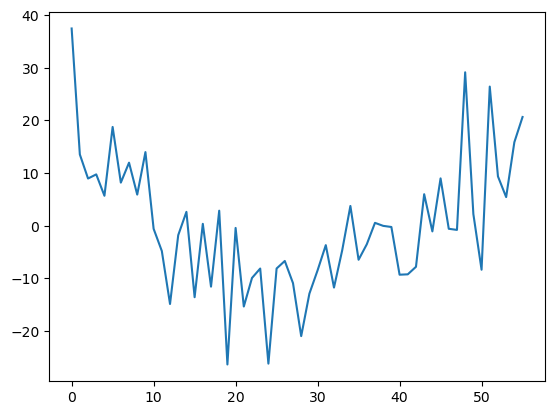

In [22]:
reg2.resid.plot()
plt.show()

In [23]:
# Now that we have the seasonality in control, the resid plot seems random.

---

5. Estimate a non-linear regression model using polynomials for the beer production using a dummy variable for each quarter. You need to determine the correct degree of the polynomial. Is the non-linear fit better than the linear fit? How can you tell?

In [24]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    val   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     236.9
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.87e-32
Time:                        23:35:31   Log-Likelihood:                -221.28
No. Observations:                  56   AIC:                             452.6
Df Residuals:                      51   BIC:                             462.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          244.0772      4.597     53.098      0.000     234.849     253.305
C(quarter)[T.Q2]   -49.5157      4.986     -9.932      0.000     -59.525     -39.507
C(quarter)[T.Q3]   -33.3885      4.989     -6.692      0.000     -43.405     -23.372
C(quarter)[T.Q4]    44.3816      4.995      8.885      0.000      34.353      54.410
t                    2.4442      0.109     22.365      0.000       2.225       2.664
==============================================================================
Omnibus:                        4.613   Durbin-Watson:                   1.039
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                3.566
Skew:                           0.532   Prob(JB):                        0.168
Kurtosis:                       3.630   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
reg3 = smf.ols('val ~ t + I(t ** 2) + C(quarter)', data=abSample).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    val   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     442.2
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           4.05e-40
Time:                        23:35:31   Log-Likelihood:                -197.85
No. Observations:                  56   AIC:                             407.7
Df Residuals:                      50   BIC:                             419.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          266.3920      4.116     64.722      0.000     258.125     274.659
C(quarter)[T.Q2]   -49.4345      3.314    -14.919      0.000     -56.090     -42.779
C(quarter)[T.Q3]   -33.3073      3.316    -10.045      0.000     -39.968     -26.647
C(quarter)[T.Q4]    44.3816      3.320     13.368      0.000      37.713      51.050
t                    0.1316      0.295      0.446      0.657      -0.461       0.724
I(t ** 2)            0.0406      0.005      8.090      0.000       0.030       0.051
==============================================================================
Omnibus:                        0.798   Durbin-Watson:                   2.354
Prob(Omnibus):                  0.671   Jarque-Bera (JB):                0.264
Skew:                           0.102   Prob(JB):                        0.876
Kurtosis:                       3.268   Cond. No.                     6.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
reg4 = smf.ols('val ~ t + I(t ** 2) + I(t ** 3) + C(quarter)', data=abSample).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    val   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     379.1
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.83e-39
Time:                        23:35:31   Log-Likelihood:                -196.52
No. Observations:                  56   AIC:                             407.0
Df Residuals:                      49   BIC:                             421.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          271.4365      5.215     52.052      0.000     260.957     281.916
C(quarter)[T.Q2]   -49.2643      3.271    -15.062      0.000     -55.837     -42.691
C(quarter)[T.Q3]   -32.9685      3.279    -10.056      0.000     -39.557     -26.380
C(quarter)[T.Q4]    44.8907      3.292     13.637      0.000      38.276      51.506
t                   -0.9331      0.749     -1.245      0.219      -2.439       0.573
I(t ** 2)            0.0868      0.030      2.856      0.006       0.026       0.148
I(t ** 3)           -0.0005      0.000     -1.542      0.130      -0.001       0.000
==============================================================================
Omnibus:                        0.462   Durbin-Watson:                   2.458
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.185
Skew:                           0.138   Prob(JB):                        0.912
Kurtosis:                       3.055   Cond. No.                     3.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# The non-linear regression model using polynomial of second degree is the better fit than the linear fit.
# The adjusted R-squared increases until the third degree, but the third degree is significantly not different from zero, which means it's a worst fit.

---

6. Use the model from part 5 to predict the beer production for each quarter of 1970, 1971 and 1972. Make a graph for your predictions, including a 95 percent confidence interval and the actual values for the beer production. Do you think your predictions are accurate?

In [28]:
pred = reg4.get_prediction(ab).summary_frame()
pred

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,270.589674,4.647725,261.249721,279.929627,250.862696,290.316652
1,220.648956,4.252083,212.104075,229.193837,201.285746,240.012166
2,236.435486,3.918904,228.560155,244.310818,217.358281,255.512692
3,313.949266,3.645588,306.623183,321.275349,295.092161,332.806371
4,268.873856,3.187379,262.468578,275.279134,250.355042,287.392671
...,...,...,...,...,...,...
63,470.431145,11.387645,447.546815,493.315474,441.697689,499.164600
64,429.055922,12.915785,403.100680,455.011164,397.821429,460.290415
65,383.269803,14.088597,354.957707,411.581900,350.050927,416.488679
66,403.003200,15.340766,372.174777,433.831623,367.615199,438.391200


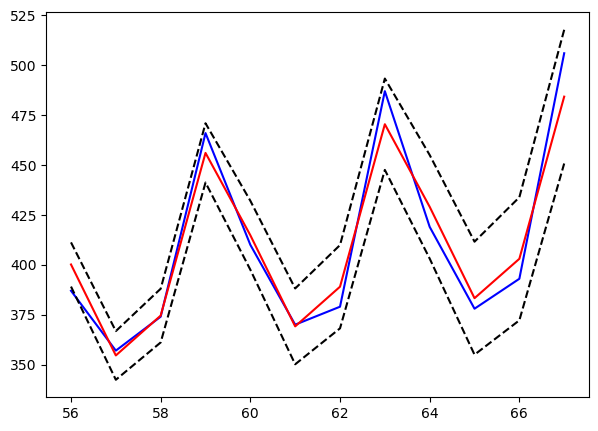

In [29]:
y_hat = pred['mean']
y_lb = pred['mean_ci_lower']
y_ub = pred['mean_ci_upper']

timeFilter = ab.year.astype(int) >= 1970

plt.figure(figsize=(7,5))
ab.val[timeFilter].plot(color='blue')
y_hat[timeFilter].plot(color='red')
y_lb[timeFilter].plot(color='black', linestyle='dashed')
y_ub[timeFilter].plot(color='black', linestyle='dashed')
plt.show()

In [30]:
# The predictions mostly fall within the 95% confidence interval. Therefore, it is a fairly accurate prediction.

---
---

## Problem 2. Unsupervised Machine Learning: Clustering

For this problem use the spotify_songs.csv data to create playlists of similar songs using the K-means algorithm.

In [31]:
ssOriginal = pd.read_csv('data/spotify_songs.csv')

---
---

1. Inspect the variables in the dataset using the .head() command. Create a separate data frame including only the numeric variables in the data set (see the .select_dtypes() method). Also, use the .drop() method to delete the track_popularity variable as this will bias your results.

In [32]:
ssOriginal.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [33]:
ss = ssOriginal.select_dtypes(include='number')
ss.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [34]:
ss.drop(columns='track_popularity', inplace=True)

In [35]:
ss.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


---

2. Use the preprocessing.scale() function to standardize each variable.

In [36]:
ssZ = pd.DataFrame(scale(ss))
ssZ.columns = ss.columns
ssZ.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.642049,1.201614,0.173200,1.367123,0.876177,-0.481362,-0.333898,-0.377953,-0.809230,0.031908,0.042927,-0.518874
1,0.490412,0.643317,1.557627,0.585766,0.876177,-0.688642,-0.468670,-0.359177,1.081061,0.782522,-0.777198,-1.056268
2,0.138889,1.284529,-1.211227,1.100090,-1.141322,-0.324422,-0.436799,-0.377849,-0.519562,0.439384,0.116227,-0.822017
3,0.435271,1.279002,0.450085,0.984309,0.876177,-0.050024,-0.667642,-0.377911,0.089582,-1.001795,0.039953,-0.947750
4,-0.033426,0.742815,-1.211227,0.685151,0.876177,-0.702460,-0.432701,-0.377953,-0.692585,0.919777,0.115037,-0.614172


---

3. Run the K-means algorithm with 4 clusters


In [37]:
ssKmeans = KMeans(n_clusters=4, random_state=1).fit(ssZ)
ssKmeans

/Users/davidekim/tensorflow/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

---

4. Use the estimation from the K-means algorithm to predict the cluster value for
each observation. Use this information to compute the average value of each numeric variable per cluster. Describe what makes each cluster distinct from each other.

In [38]:
ssCentroids = pd.DataFrame(ssKmeans.cluster_centers_)
ssCentroids.columns = ss.columns
ssCentroids

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.680419,0.563929,-0.076551,0.477543,0.086785,-0.221866,-0.467504,-0.277753,0.310168,-0.398417,0.409317,0.014930
1,-0.333283,-1.451408,-0.043696,-1.228153,0.085980,-0.183552,1.484346,0.004214,-0.209402,-0.480296,-0.291996,0.008475
2,0.042842,0.478238,0.000213,-0.077712,-0.007687,-0.342687,-0.471557,2.908945,-0.000432,-0.519361,0.159843,0.431838
3,0.658574,0.020623,0.077337,0.107757,-0.100262,0.310452,-0.110863,-0.327979,-0.165148,0.597284,-0.242057,-0.096169


In [39]:
## Centroid 1
#   has lower than average danceability, key, speechiness, acousticness, instrumentalness, and valence.
#   has higher than average energy, loudness, mode, liveness, tempo and duration

## Centroid 2
#   has lower than average danceability, energy, key, loudness, speechiness, liveness, valence, and tempo.
#   has higher than average mode, acousticness, instrumentalness, and duration

## Centroid 3
#   has lower than average loudness, mode, speechiness, acousticness, liveness, and valence.
#   has higher than average danceability, energy, key, instrumentalness, tempo, and duration.

## Centroid 4
#   has lower than average mode, acousticness, instrumentalness, liveness, tempo, and duration.
#   has higher than average danceability, energy, key, loudness, speechiness, and valence.

In [40]:
ss['cluster'] = pd.Series(ssKmeans.labels_)
ss

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,0
1,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,3
2,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,0
3,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,0
4,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,0
32829,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,0
32830,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,0
32831,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,0


---

5. For each cluster, sort the observations by how close they are to their own centroid (see the euclidean_distances() function for help on calculating the distances). Using the nearest 100 songs to the centroid, take a random sample of five songs and call it a playlist. Listen to a playlist from each of the clusters and describe the playlist as best as you can. If you had to quickly describe each playlist to a friend, how would you describe them?

In [41]:
# Function to find the euclidean distance of the data that is in the specific cluster (parameter = clust) and the centroid data for the specific cluster.
# Bring the index to find the songs later.

def edFunction(clust):
    return pd.DataFrame(euclidean_distances(ss.loc[ss.cluster==clust].drop(columns='cluster'), pd.DataFrame(ssCentroids.iloc[clust]).T), index=ss.loc[ss.cluster==clust].index)

In [42]:
# Run the function for each cluster number.

ed0 = edFunction(0)
ed1 = edFunction(1)
ed2 = edFunction(2)
ed3 = edFunction(3)

In [43]:
# Function to find the 100 smallest (closest to the centroid) data from the euclidean distance data.
# Get 5 samples from the result.

def smallest100Sample5(ed):
    return ssOriginal.iloc[ed[0].nsmallest(100).index][['track_name', 'track_artist']].sample(5)

In [44]:
# Rap feeling, but have some non rap such as rock. Is this the limit of clustering?

smallest100Sample5(ed0)

,track_name,track_artist
27016,LUV,WHIPPED CREAM
12093,Stone Cold Crazy - Remastered 2011,Queen
340,Through To You,Lyente
1802,Mine,Bazzi
17809,Perreito,Mariah


In [45]:
# Mellow Feeling

smallest100Sample5(ed1)

,track_name,track_artist
23580,Lucy in the Sky With Diamonds,Bill Evans
12074,Seven Seas Of Rhye - Remastered 2011,Queen
5752,sorry,chief.
22451,Forward (feat. James Blake),Beyoncé
4712,Birthday Suit,Cosmo Sheldrake


In [46]:
# EDM Feeling

smallest100Sample5(ed2)

,track_name,track_artist
28134,I was told the glasses,Semser
28121,The End,Martin Numan
6515,Hard'em,the.lazyb
28383,Omega,KaZo
28161,The Reddish Flower,Rob Stepwart


In [47]:
# Rap feeling, but have some non rap. Is this the limit of clustering?

smallest100Sample5(ed3)

,track_name,track_artist
6948,Paradise,J Rocc
21681,Friendo,H-Rap Bey
8117,No Words - Skit,Hopsin
9583,STAND,Comethazine
19754,Panini,Lil Nas X


---

6. Write a function that given a song generates a list of five similar songs selected randomly.

In [48]:
# Function to find the song with the track id and then find the cluster it belongs to.
# Get 5 samples from the same cluster.

def similarSongs(track_id):
    return ssOriginal.iloc[ss.loc[ss.cluster == ss.iloc[ssOriginal.loc[ssOriginal.track_id == track_id].index].iloc[0].cluster].sample(5).index][['track_id', 'track_name', 'track_artist']]

In [49]:
track_id = '0r7CVbZTWZgbTCYdfa2P31'

similarSongs(track_id)

,track_id,track_name,track_artist
475,5MaDeMdqsPsZTxNWdEZPVH,Starry Night,Mamamoo
133,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers
7980,7EZPH9Px3gXlxD5KJDwtwc,Bandz A Make Her Dance (feat. Lil' Wayne & 2 C...,Juicy J
8108,7iL6o9tox1zgHpKUfh9vuC,In Da Club,50 Cent
22149,4F1yvJfQ7gJkrcgFJQDjOr,Playinwitme (feat. Kehlani),KYLE


---
---

## Problem 3. Non-Linear Models with Cross-Section Data (OPTIONAL)

This problem is optional. You can skip it when preparing for the next quiz. Load the caSchools.csv data.

In [50]:
cas = pd.read_csv('data/caSchools.csv')
cas.drop(columns='Unnamed: 0', inplace=True)
cas.head()

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math
0,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000
1,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024
2,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024
3,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000
4,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024


In [51]:
cas.shape

(420, 14)

---
---

1. Make a new variable using the average of the math and read scores. Call it ac . Add it to the data.

In [52]:
cas['ac'] = (cas['read'] + cas['math'])/2
cas.head()

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,ac
0,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,690.799988
1,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,661.200012
2,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,643.600006
3,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,647.700012
4,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,640.850006


---

2. Make a scatterplot with ac in the y-axis and income in the x-axis. Describe the relation between ac and income . Pay close attention to potential preference of diminishing or increasing returns, or any non-linear relation.

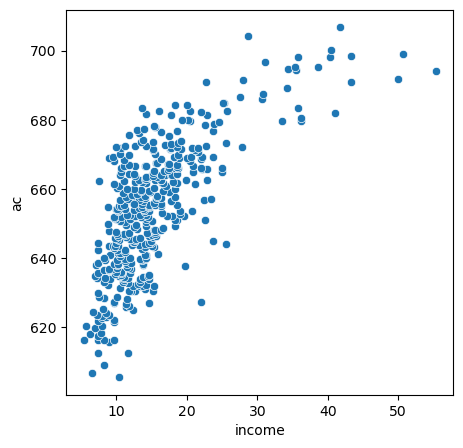

In [53]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=cas, x='income', y='ac')
plt.show()

In [54]:
# There is a non-linear positive relationship between ac and income

---

3. Let ac be the dependent variable and income the independent variable. Fit a linear regression model and interpret the results.

In [55]:
regCASLin = smf.ols('ac ~ income', data=cas).fit()
regCASLin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ac   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     430.8
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.75e-66
Time:                        23:35:33   Log-Likelihood:                -1684.5
No. Observations:                 420   AIC:                             3373.
Df Residuals:                     418   BIC:                             3381.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    625.3836      1.532    408.106      0.000     622.371     628.396
income         1.8785      0.091     20.756      0.000       1.701       2.056
==============================================================================
Omnibus:                        2.473   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                2.480
Skew:                          -0.148   Prob(JB):                        0.289
Kurtosis:                       2.766   Cond. No.                         39.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# Intercept => When income equals to 0, the average 'ac' is 625.3836
# Income => When one unit of average income increases, the average 'ac' increases by 1.8785

---

4. Repeat (3). But now use a non-linear model using polynomials. You need to determine the correct degree of polynomial to use.

In [57]:
smf.ols('ac ~ income', data=cas).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ac   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     430.8
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.75e-66
Time:                        23:35:33   Log-Likelihood:                -1684.5
No. Observations:                 420   AIC:                             3373.
Df Residuals:                     418   BIC:                             3381.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    625.3836      1.532    408.106      0.000     622.371     628.396
income         1.8785      0.091     20.756      0.000       1.701       2.056
==============================================================================
Omnibus:                        2.473   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                2.480
Skew:                          -0.148   Prob(JB):                        0.289
Kurtosis:                       2.766   Cond. No.                         39.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
smf.ols('ac ~ income + I(income ** 2)', data=cas).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ac   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     261.3
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.78e-74
Time:                        23:35:34   Log-Likelihood:                -1662.7
No. Observations:                 420   AIC:                             3331.
Df Residuals:                     417   BIC:                             3344.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        607.3017      3.046    199.362      0.000     601.314     613.290
income             3.8510      0.304     12.657      0.000       3.253       4.449
I(income ** 2)    -0.0423      0.006     -6.758      0.000      -0.055      -0.030
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   0.951
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.378
Skew:                          -0.048   Prob(JB):                        0.828
Kurtosis:                       3.111   Cond. No.                     2.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
smf.ols('ac ~ income + I(income ** 2) + I(income ** 3)', data=cas).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ac   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.78e-73
Time:                        23:35:34   Log-Likelihood:                -1661.6
No. Observations:                 420   AIC:                             3331.
Df Residuals:                     416   BIC:                             3347.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        600.0790      5.830    102.937      0.000     588.620     611.538
income             5.0187      0.859      5.839      0.000       3.329       6.708
I(income ** 2)    -0.0958      0.037     -2.564      0.011      -0.169      -0.022
I(income ** 3)     0.0007      0.000      1.452      0.147      -0.000       0.002
==============================================================================
Omnibus:                        0.567   Durbin-Watson:                   0.981
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.385
Skew:                          -0.047   Prob(JB):                        0.825
Kurtosis:                       3.115   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# Second degree of polynomial is the best fit.
# Third degree is significantly not different from zero

---

5. Repeat (3). But now use different logarithmic transformation on income. That is, instead of using income as the x-variable, use the natural logarithm of income.

In [61]:
regCASLog = smf.ols('ac ~ np.log(income)', data=cas).fit()
regCASLog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ac   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     537.4
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           4.77e-77
Time:                        23:35:34   Log-Likelihood:                -1659.7
No. Observations:                 420   AIC:                             3323.
Df Residuals:                     418   BIC:                             3331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        557.8323      4.200    132.806      0.000     549.576     566.089
np.log(income)    36.4197      1.571     23.183      0.000      33.332      39.508
==============================================================================
Omnibus:                        0.548   Durbin-Watson:                   0.991
Prob(Omnibus):                  0.760   Jarque-Bera (JB):                0.388
Skew:                          -0.059   Prob(JB):                        0.824
Kurtosis:                       3.091   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

6. Out of the models you estimated, which one fits the data best? How can you tell?

In [62]:
# The natural logarithm of income is a better fit because it has a higher adjusted r-squared and it is significantly different from zero.

---